# Business Understanding

## Problem Statement
Each year, students applying for tertiary education through KUCCPS (Kenya Universities and Colleges Central Placement Service) face challenges in identifying suitable course clusters. These challenges often arise due to the dynamic nature of cluster point requirements, varied student performance, and changes in institutional offerings. Students frequently lack the tools or insights to make data-driven decisions about which courses they are likely to qualify for, resulting in suboptimal course applications or outright rejections

## Objectives
The main objective of this project is to: 
1. Build a predictive model that predicts the most probable course cluster cutoff based  historical trends.

2. Recommends suitable courses aligned with the predicted cluster and student's performance.

3. Improves decision-making for applicants by providing personalized, data-driven course suggestions.
 

# Data Understanding
.

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\Mich\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading dataset**

In [2]:
df = pd.read_csv("programmes.csv")

In [3]:
df.head(5)

,degree,Cluster Subject 1,Cluster Subject 2,Cluster Subject 3,Cluster Subject 4,Subject 1 Requirement,Subject 2 Requirement,Institution,Programme,id,...,institution_name,2015,2016,2017,2018,2019,2020,2021,created_at,updated_at
0,BACHELOR OF TECHNICAL EDUCATION (BUILDING CONS...,MAT A,PHY,HAG,BIO,MAT A: C+,PHY: C+,KIRINYAGA UNIVERSITY,BACHELOR OF TECHNICAL EDUCATION (BUILDING CONS...,836,...,KIRINYAGA UNIVERSITY,NaN,NaN,NaN,NaN,24.460,19.481,16.787,2022-10-01 15:16:58,2022-10-01 15:16:58
1,BACHELOR OF SCIENCE IN GEOINFORMATICS,MAT A,PHY,BIO,BIO,MAT A: C+,PHY: C+,TAITA TAVETA UNIVERSITY,BACHELOR OF SCIENCE IN GEOINFORMATICS,1938,...,TAITA TAVETA UNIVERSITY,NaN,NaN,NaN,26.200,24.919,17.674,17.802,2022-10-01 15:16:58,2022-10-01 15:16:58
2,BACHELOR OF SCIENCE (GEOPHYSICS AND MINERALOGY),MAT A,PHY,BIO,BIO,MAT A: C+,PHY: C+,KISII UNIVERSITY,BACHELOR OF SCIENCE (GEOPHYSICS AND MINERALOGY),1862,...,KISII UNIVERSITY,29.574,22.741,NaN,25.133,24.607,17.674,17.802,2022-10-01 15:16:58,2022-10-01 15:16:58
3,BACHELOR OF SCIENCE (GEOLOGY),MAT A,PHY,BIO,BIO,MAT A: C+,PHY: C+,SOUTH EASTERN KENYA UNIVERSITY,BACHELOR OF SCIENCE (GEOLOGY),126,...,SOUTH EASTERN KENYA UNIVERSITY,23.000,23.571,NaN,23.942,28.672,17.674,17.802,2022-10-01 15:16:58,2022-10-01 15:16:58
4,BACHELOR OF SCIENCE (GEOLOGY),MAT A,PHY,BIO,BIO,MAT A: C+,PHY: C+,SOUTH EASTERN KENYA UNIVERSITY,BACHELOR OF SCIENCE (GEOLOGY),127,...,UNIVERSITY OF NAIROBI,34.972,34.979,31.293,30.591,32.490,24.712,17.802,2022-10-01 15:16:58,2022-10-01 15:16:58


In [36]:
df.tail(5)

,degree,Cluster Subject 1,Cluster Subject 2,Cluster Subject 3,Cluster Subject 4,Subject 1 Requirement,Subject 2 Requirement,Institution,Programme,id,...,2016,2017,2018,2019,2020,2021,created_at,updated_at,Cluster Group,subject_key
1270,BACHELOR OF SCIENCE (GEOGRAPHY AND NATURAL RES...,BIO,CHE,MAT A,ENG,BIO: C+,CHE: C+,JARAMOGI OGINGA ODINGA UNIVERSITY OF SCIENCE A...,BACHELOR OF ARTS IN GEOGRAPHY AND NATURAL RESO...,2073,...,26.747,26.747,24.930,24.952,16.791,19.921,2022-10-01 15:16:58,2022-10-01 15:16:58,3,"(BIO, CHE, ENG, MAT A)"
1271,BACHELOR OF SCIENCE IN ANIMAL PRODUCTS TECHNOLOGY,BIO,CHE,MAT A,ENG,BIO: C+,MAT A: C+,CHUKA UNIVERSITY,BACHELOR OF SCIENCE IN ANIMAL PRODUCTS TECHNOLOGY,2075,...,24.405,24.405,24.405,24.405,16.791,17.459,2022-10-01 15:16:58,2022-10-01 15:16:58,3,"(BIO, CHE, ENG, MAT A)"
1272,BACHELOR OF SCIENCE ( ENVIRONMENTAL SCIENCE AN...,BIO,CHE,MAT A,ENG,BIO: C+,CHE: C+,AFRICA NAZARENE UNIVERSITY,BACHELOR OF SCIENCE IN ENVIRONMENTAL RESOURCE ...,2110,...,34.748,34.748,34.748,34.748,16.791,17.459,2022-10-01 15:16:58,2022-10-01 15:16:58,3,"(BIO, CHE, ENG, MAT A)"
1273,BACHELOR OF SCIENCE (ENVIRONMENTAL MANAGEMENT),BIO,CHE,MAT A,ENG,BIO: C+,CHE: C+,AFRICA NAZARENE UNIVERSITY,BACHELOR OF SCIENCE IN ENVIRONMENTAL RESOURCE ...,2134,...,24.085,24.085,27.484,27.484,27.484,17.459,2022-10-01 15:16:58,2022-10-01 15:16:58,3,"(BIO, CHE, ENG, MAT A)"
1274,BACHELOR OF SCIENCE (ENVIRONMENTAL MANAGEMENT),BIO,CHE,MAT A,ENG,BIO: C+,CHE: C+,AFRICA NAZARENE UNIVERSITY,BACHELOR OF SCIENCE IN ENVIRONMENTAL RESOURCE ...,2135,...,24.329,24.329,24.329,24.329,16.791,17.459,2022-10-01 15:16:58,2022-10-01 15:16:58,3,"(BIO, CHE, ENG, MAT A)"


In [4]:
for i in ['Cluster Subject 1','Cluster Subject 2', 'Cluster Subject 3','Cluster Subject 4']:
    print(df[i].unique())

['MAT A' 'CHE' 'ENG' 'BIO' 'GER' 'FRE' 'MUC' 'CRE']
['PHY' 'MAT A' 'BIO' 'CHE' 'ENG']
['HAG' 'BIO' 'CHE' 'PHY' 'MAT A']
['BIO' 'ENG' 'PHY' 'KIS']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   degree                 1275 non-null   object 
 1   Cluster Subject 1      1275 non-null   object 
 2   Cluster Subject 2      1275 non-null   object 
 3   Cluster Subject 3      1275 non-null   object 
 4   Cluster Subject 4      1275 non-null   object 
 5   Subject 1 Requirement  1146 non-null   object 
 6   Subject 2 Requirement  697 non-null    object 
 7   Institution            1275 non-null   object 
 8   Programme              1275 non-null   object 
 9   id                     1275 non-null   int64  
 10  course_id              1275 non-null   int64  
 11  program_code           1275 non-null   object 
 12  institution_name       1275 non-null   object 
 13  2015                   845 non-null    float64
 14  2016                   906 non-null    float64
 15  2017

# Data Cleaning

## Correct Formats

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   degree                 1275 non-null   object 
 1   Cluster Subject 1      1275 non-null   object 
 2   Cluster Subject 2      1275 non-null   object 
 3   Cluster Subject 3      1275 non-null   object 
 4   Cluster Subject 4      1275 non-null   object 
 5   Subject 1 Requirement  1146 non-null   object 
 6   Subject 2 Requirement  697 non-null    object 
 7   Institution            1275 non-null   object 
 8   Programme              1275 non-null   object 
 9   id                     1275 non-null   int64  
 10  course_id              1275 non-null   int64  
 11  program_code           1275 non-null   object 
 12  institution_name       1275 non-null   object 
 13  2015                   845 non-null    float64
 14  2016                   906 non-null    float64
 15  2017

## Missing Values

In [7]:
df.isna().sum()

degree                     0
Cluster Subject 1          0
Cluster Subject 2          0
Cluster Subject 3          0
Cluster Subject 4          0
Subject 1 Requirement    129
Subject 2 Requirement    578
Institution                0
Programme                  0
id                         0
course_id                  0
program_code               0
institution_name           0
2015                     430
2016                     369
2017                     821
2018                     272
2019                     214
2020                     121
2021                     124
created_at                 0
updated_at                 0
dtype: int64

In [8]:
nan_years = [str(y) for y in range(2015, 2022)]

In [9]:
df[nan_years] = df[nan_years].ffill(axis=1)


In [10]:
df[nan_years] = df[nan_years].bfill(axis=1)

In [11]:
df.isna().sum()

degree                     0
Cluster Subject 1          0
Cluster Subject 2          0
Cluster Subject 3          0
Cluster Subject 4          0
Subject 1 Requirement    129
Subject 2 Requirement    578
Institution                0
Programme                  0
id                         0
course_id                  0
program_code               0
institution_name           0
2015                       9
2016                       9
2017                       9
2018                       9
2019                       9
2020                       9
2021                       9
created_at                 0
updated_at                 0
dtype: int64

## Feature Engineering

In [12]:
# Group I: Compulsory
group_I = {
    "ENG": "English",
    "KIS": "Kiswahili",
    "MAT A": "Mathematics Alternative A",
    "MAT B": "Mathematics Alternative B"
}

# Group II: Sciences
group_II = {
    "BIO": "Biology",
    "PHY": "Physics",
    "CHE": "Chemistry"
}

# Group III: Humanities
group_III = {
    "HIST": "History",
    "GEO": "Geography",
    "CRE": "Christian Religious Education",
    "IRE": "Islamic Religious Education",
    "HRE": "Hindu Religious Education"
}

# Group IV: Technical/Applied
group_IV = {
    "AGR": "Agriculture",
    "HSC": "Home Science",
    "ART/DES": "Art and Design",
    "CSC": "Computer Studies",
    "D&D": "Drawing and Design",
    "ELEC": "Electricity",
    "MET": "Metal Work",
    "POW": "Power Mechanics",
    "WW": "Woodwork",
    "AVI": "Aviation Technology"
}

# Group V: Languages & Others
group_V = {
    "FRE": "French",
    "GER": "German",
    "ARAB": "Arabic",
    "MUS": "Music",
    "SL": "Kenya Sign Language"
}


In [13]:
cluster_subjects = {
    1: ["ENG/KIS", "MAT A/B", "BIO/PHY/CHE", "GRP III/IV/V"],        # Law
    2: ["ENG/KIS", "ENG/KIS", "MAT A/B", "GRP II/III/IV/V"],         # Business
    3: ["ENG/KIS", "MAT A/B or GRP II", "GRP III", "GRP II/III/IV/V"], # Social Sciences
    4: ["MAT A", "PHY", "CHE/BIO/GEO", "GRP II/III/IV/V"],           # Geosciences
    5: ["MAT A", "PHY", "CHE/BIO/GEO", "GRP II/III/IV/V"],           # Engineering
    6: ["MAT A", "PHY", "GRP III", "GRP II/III/IV/V"],               # Architecture
    7: ["MAT A", "PHY", "BIO/CHE/GEO", "GRP II/III/IV/V"],           # Computing
    8: ["MAT A", "BIO", "PHY/CHE", "GRP II/III/IV/V"],               # Agribusiness
    9: ["MAT A", "GRP II", "2nd GRP II", "GRP II/III/IV/V"],         # General Science
    10: ["MAT A", "GRP II", "GRP III", "GRP II/III/IV/V"],           # Actuarial/Economics
    11: ["CHE", "MAT A/B or PHY", "BIO/HSC", "ENG/KIS or GRP III/IV/V"], # Interior Design
    12: ["BIO/HSC", "MAT A/B", "GRP II/III", "ENG/KIS or GRP II/III/IV/V"], # Sport Science
    13: ["BIO", "CHE", "MAT A or PHY", "ENG/KIS or GRP II/III/IV/V"],     # Medicine
    14: ["HIST/GEO", "ENG/KIS", "MAT A/B or GRP II", "GRP II/III/IV/V"],  # History
    15: ["BIO", "CHE", "MAT A/PHY/GEO", "ENG/KIS or GRP II/III/IV/V"],    # Agriculture
    16: ["GEO", "MAT A/B", "GRP II", "GRP II/III/IV/V"],              # Geography
    17: ["FRE/GER", "ENG/KIS", "MAT A/B or GRP II/III", "GRP II/III/IV/V"], # Languages
    18: ["MUS", "ENG/KIS", "MAT A/B or GRP II/III", "GRP II/III/IV/V"],    # Music
    19: ["ENG", "MAT A/B or GRP II", "2nd GRP II", "KIS or GRP II/III/IV/V"], # Education
    20: ["CRE/IRE/HRE", "ENG/KIS", "2nd GRP III", "GRP II/IV/V"],     # Religious Studies
}


In [14]:
def assign_cluster(row):
    subjects = [row['Cluster Subject 1'], row['Cluster Subject 2'],
                row['Cluster Subject 3'], row['Cluster Subject 4']]
    
    for cluster, reqs in cluster_subjects.items():
        matches = sum(any(req in subj for req in reqs if isinstance(req, str)) for subj in subjects)
        if matches >= 3:  # at least 3 subjects match (tolerant matching)
            return cluster
    return None


In [15]:
df['Cluster Group'] = df.apply(assign_cluster, axis=1)

In [16]:
df.isna().sum()

degree                     0
Cluster Subject 1          0
Cluster Subject 2          0
Cluster Subject 3          0
Cluster Subject 4          0
Subject 1 Requirement    129
Subject 2 Requirement    578
Institution                0
Programme                  0
id                         0
course_id                  0
program_code               0
institution_name           0
2015                       9
2016                       9
2017                       9
2018                       9
2019                       9
2020                       9
2021                       9
created_at                 0
updated_at                 0
Cluster Group            521
dtype: int64

In [17]:

# Step 1: Create a "fingerprint" for the subject set (order-independent)
df['subject_key'] = df[['Cluster Subject 1','Cluster Subject 2','Cluster Subject 3','Cluster Subject 4']]\
    .apply(lambda row: tuple(sorted(row.astype(str).str.strip())), axis=1)

# Step 2: Map each unique subject combination to a cluster group number
subject_to_cluster = {combo: idx+1 for idx, combo in enumerate(df['subject_key'].unique())}

# Step 3: Assign same cluster to all degrees with same subject requirements
df['Cluster Group'] = df['subject_key'].map(subject_to_cluster)

In [ ]:
df.Institution.unique()

In [18]:
#df.dropna(inplace=True)

## Data Visualization

## Univariate Analysis

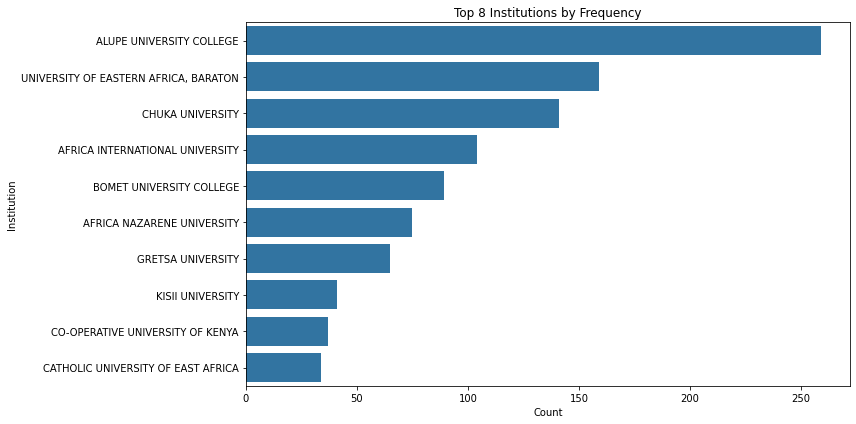

In [29]:
# top 8 institutions by frequency
top_institutions = df['Institution'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_institutions.values, y=top_institutions.index)

plt.xlabel("Count")
plt.ylabel("Institution")
plt.title("Top 8 Institutions by Frequency")
plt.tight_layout()
plt.show()

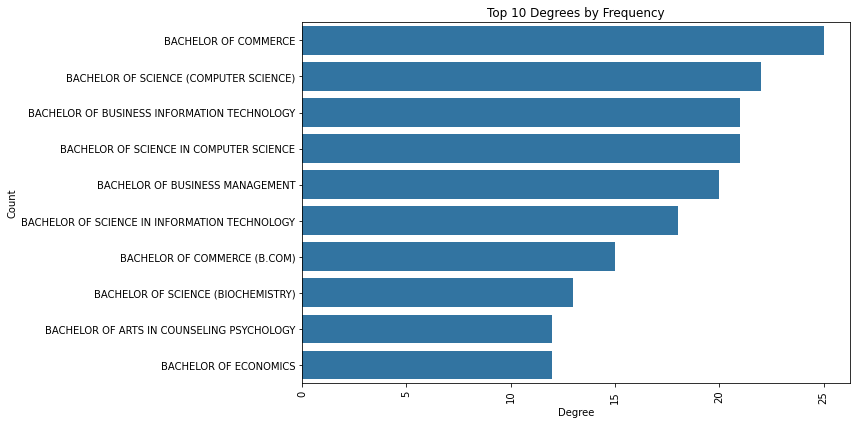

In [20]:
top_degrees= df['degree'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_degrees.values, y=top_degrees.index)

plt.xticks(rotation=90)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Top 10 Degrees by Frequency")
plt.tight_layout()
plt.show()

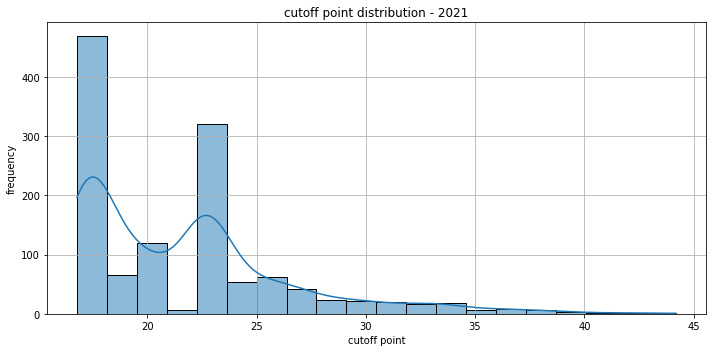

In [21]:
plt.figure(figsize=(10, 5))  
sns.histplot(df['2021'], bins=20, kde=True)  

plt.title("cutoff point distribution - 2021")
plt.xlabel("cutoff point")
plt.ylabel("frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

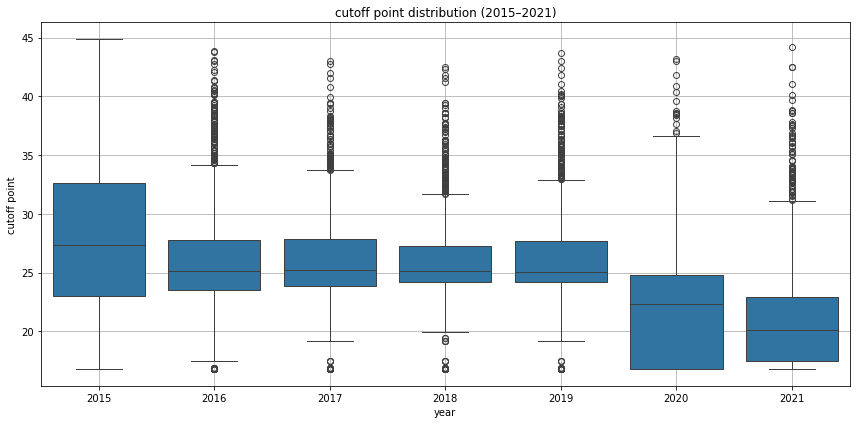

In [22]:
# define year columns
year_cols = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

# ensure numeric values
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# reshape to long format
df_melted = df.melt(value_vars=year_cols, var_name='Year', value_name='Cutoff')

# plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Cutoff', data=df_melted)

plt.title("cutoff point distribution (2015–2021)")
plt.xlabel("year")
plt.ylabel("cutoff point")
plt.grid(True)
plt.tight_layout()
plt.show()

## Bivariate Analysis

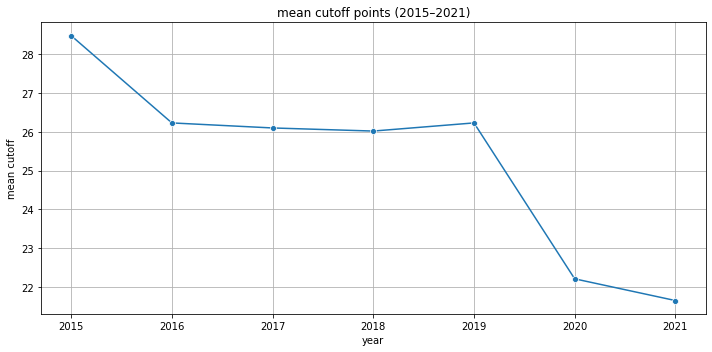

In [25]:
# compute mean cutoff per institution and round
mean_cutoffs = df.groupby('Institution')[year_cols].mean().mean(axis=1).round(2)

# count programmes per institution
programme_counts = df['Institution'].value_counts()

# combine into one DataFrame
inst_df = pd.DataFrame({
    'Institution': mean_cutoffs.index,
    'Mean Cutoff': mean_cutoffs.values,
    'Programme Count': programme_counts[mean_cutoffs.index].values
})

# define year columns
year_cols = ['2015', '2016', '2017', '2018', '2019', '2020', '2021'] 

# compute mean per year
mean_cutoffs = df[year_cols].mean().round(2)

# plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=mean_cutoffs.index, y=mean_cutoffs.values, marker='o')

plt.title("mean cutoff points (2015–2021)")
plt.xlabel("year")
plt.ylabel("mean cutoff")
plt.grid(True)
plt.tight_layout()
plt.show()


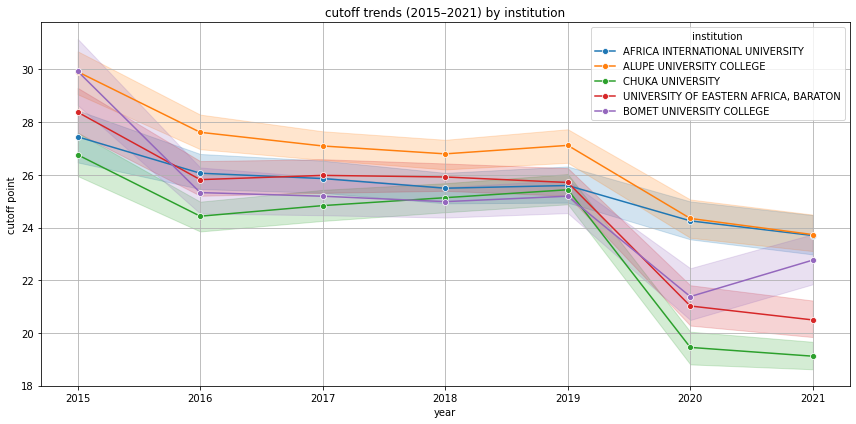

In [30]:
# convert year columns to numeric
year_cols = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# pick top 5 institutions
top_institutions = df['Institution'].value_counts().nlargest(5).index
df_top = df[df['Institution'].isin(top_institutions)]

# reshape data to long format
df_melted = df_top.melt(id_vars='Institution', value_vars=year_cols,
                        var_name='Year', value_name='Cutoff')
df_melted['Year'] = df_melted['Year'].astype(int)

# plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='Institution', marker='o')

plt.title("cutoff trends (2015–2021) by institution")
plt.xlabel("year")
plt.ylabel("cutoff point")
plt.legend(title='institution')
plt.grid(True)
plt.tight_layout()
plt.show()


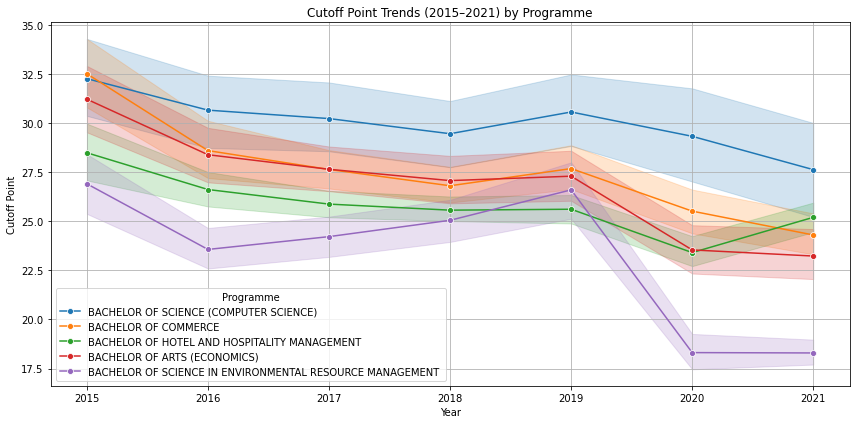

In [31]:

# Example: Select top 5 programmes with most entries
top_programmes = df['Programme'].value_counts().nlargest(5).index
df_top = df[df['Programme'].isin(top_programmes)]

# Melt the DataFrame to long format for plotting
df_melted = df_top.melt(
    id_vars='Programme',
    value_vars=['2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    var_name='Year',
    value_name='Cutoff'
)

# Convert 'Year' to numeric if needed
df_melted['Year'] = df_melted['Year'].astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='Programme', marker='o')

plt.title("Cutoff Point Trends (2015–2021) by Programme")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title="Programme")
plt.grid(True)
plt.tight_layout()
plt.show()


## Multivariate Analysis

# Feature Engineering

# Preprocessing

In [32]:

# features and targe
feature_years = [str(y) for y in range(2015, 2021)]
target_year = '2021'

# buildingmodeling DataFrame
df_model = df[feature_years + ['course_id', target_year]].dropna()

X = df_model[feature_years + ['course_id']]
y = df_model[target_year]

# preprocessor: just passthrough (since all features are numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('features', 'passthrough', feature_years + ['course_id'])
    ]
)


**Train-test spliting**

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [34]:

# pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  ['2015', '2016', '2017',
                                                   '2018', '2019', '2020',
                                                   'course_id'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

# Evaluation

In [35]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.7076224078452933
MSE: 7.738023660806716
RMSE: 2.78173033574549
